<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/memoria_data_antes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## Fuente de datos

## Etiquetado

## Análisis

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
tqdm.pandas()

import seaborn as sns
sns.set_style("white")

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from IPython.display import Image

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
dataover = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_def.csv", sep='#',encoding='utf-8', lineterminator='\n')
taste = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_Jaime_def.csv", sep='#', encoding='utf-8')

In [ ]:
taste = taste[~taste['id'].str.contains('/')]
taste['id'] = taste['id'].astype(int)

data = taste.merge(dataover[['id','title','overview','genres','crew','cast']], left_on='id', right_on='id')
data = data[~pd.isna(data.overview)]

data = data.dropna(subset=['like'])
data['like'] = data['like'].astype(int)

data = data.drop_duplicates(subset=['id'])
data.reset_index(inplace=True,drop=True)

print(len(data))

print(data.like.value_counts(dropna=False))

data = data.drop(columns=['genres', 'crew', 'cast'])

1054
0    550
1    504
Name: like, dtype: int64


In [ ]:
data.head(5)

,id,like,title,overview
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde..."
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p..."
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b..."


In [ ]:
print("Shape of data=>",data.shape)

Shape of data=> (1054, 4)


### Distribución

Bibligrafia 

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [ ]:
data['text_array'] = data.overview.str.split(" ")
data['n_words'] = data['text_array'].apply(lambda x: len(x))
data = data.drop(columns=['text_array'])
data = data[data['n_words']>15]

Text(0, 0.5, 'Películas')

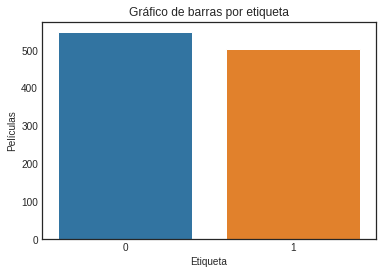

In [ ]:
sns.countplot(x='like', data=data)
# Add labels
plt.title('Gráfico de barras por etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Películas')

In [ ]:
data.head(5)

,id,like,title,overview,n_words
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde...",87
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p...",69
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...,76
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...,103
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b...",54


In [ ]:
pd.DataFrame(data.n_words.describe())

,n_words
count,1052.000000
mean,83.689163
std,34.182019
min,22.000000
25%,58.000000
50%,79.000000
75%,106.000000
max,179.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


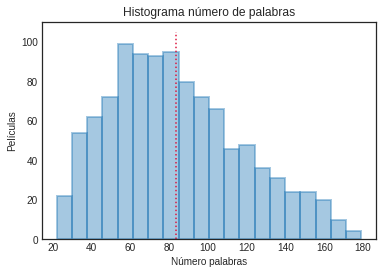

In [ ]:
# seaborn histogram
sns.distplot(data['n_words'], hist=True, kde=False, 
             bins=20,
             hist_kws={'edgecolor':'tab:blue', 'linewidth': 2})
# Add labels
plt.title('Histograma número de palabras')
plt.xlabel('Número palabras')
plt.ylabel('Películas')

mean = data.n_words.mean()
plt.vlines(mean, 0, 105, color='crimson', ls=':')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


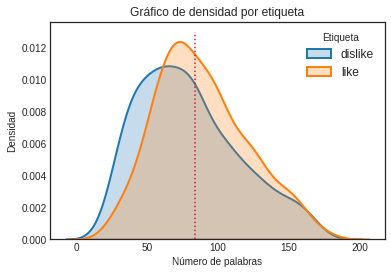

In [ ]:
subset_0 = data[data['like'] == 0]
subset_1 = data[data['like'] == 1]
    
# Draw the density plot
sns.distplot(subset_0['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'dislike')

sns.distplot(subset_1['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'like')    

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Etiqueta')
plt.title('Gráfico de densidad por etiqueta')
plt.xlabel('Número de palabras')
plt.ylabel('Densidad')

mean = data.n_words.mean()
plt.vlines(mean, 0, 0.013, color='crimson', ls=':')

### Wordcloud

Bibligrafia 

https://towardsdatascience.com/generate-modern-stylish-wordcloud-with-stylecloud-9cbb059696d2

https://github.com/minimaxir/stylecloud


In [ ]:
%pip install stylecloud

In [ ]:
stop_words = pd.read_csv("gdrive/My Drive/TFG/stopwords-es.txt",header=None)
#stop_words = stop_words[0].tolist() 
stop_words = stop_words[0].tolist() + ['padre', 'amigo', 'hombre', 'hijo', 'hija',
                                       'familia', 'amigos', 'madre']

In [ ]:
from collections import Counter

text = " ".join(data.overview.values).lower()
myDict = Counter(text.split(" "))
df_words = pd.DataFrame(pd.Series(myDict), columns=['count'])
df_words = df_words.reset_index().rename(columns={'index': 'word'})
df_words = df_words[~df_words['word'].isin(stop_words)].sort_values('count', ascending=False)

new_stop_words = df_words[df_words['count']<=5].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']>5]

new_stop_words = df_words[df_words['count']>=100].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']<100]

In [ ]:
import stylecloud

# Mirar como quitar acentos
stylecloud.gen_stylecloud(text = " ".join(data.overview.values), icon_name= "fas fa-ticket-alt",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_total.png')

/usr/local/lib/python3.7/dist-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


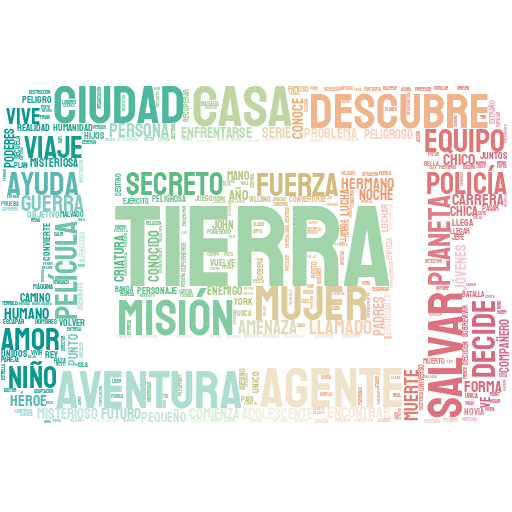

In [ ]:
Image('/content/word_cloud_total.png')

In [ ]:
stylecloud.gen_stylecloud(text = " ".join(subset_0.overview.values), icon_name= "fas fa-play",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_0.png')

/usr/local/lib/python3.7/dist-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


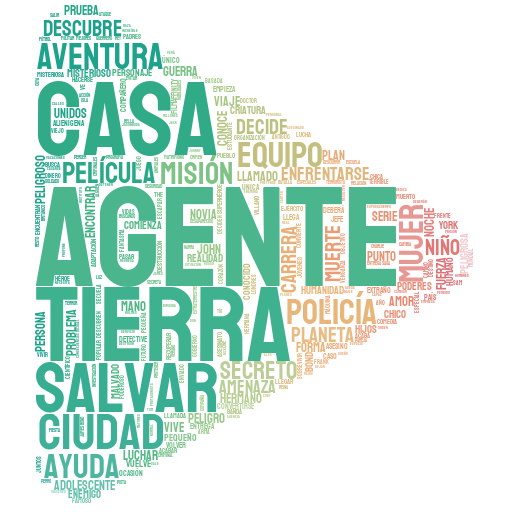

In [ ]:
Image('/content/word_cloud_0.png')

In [ ]:
stylecloud.gen_stylecloud(text = " ".join(subset_1.overview.values), icon_name="fas fa-heart",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_1.png')

/usr/local/lib/python3.7/dist-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


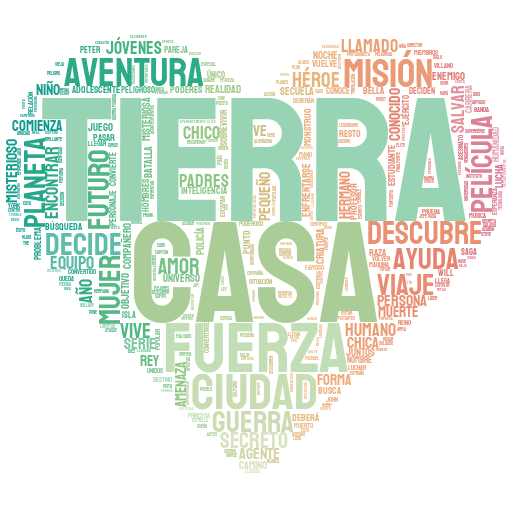

In [ ]:
Image('/content/word_cloud_1.png')